In [1]:
import pandas as pd
import numpy as np

In [2]:
# data1= pd.read_csv('/Users/zhiyue/Downloads/archive/ratings.csv')
# data2= pd.read_csv('/Users/zhiyue/Downloads/archive/movies_metadata.csv')
# data3= pd.read_csv('/Users/zhiyue/Downloads/archive/links_small.csv')
# data4= pd.read_csv('/Users/zhiyue/Downloads/archive/links.csv')
# data5= pd.read_csv('/Users/zhiyue/Downloads/archive/keywords.csv')
# data6= pd.read_csv('/Users/zhiyue/Downloads/archive/credits.csv')
data= pd.read_csv('/Users/zhiyue/Downloads/archive/user_movies.csv')

In [3]:
data.head(10)

,userId,movie_score
0,1,"{""110"":1.0,""147"":4.5,""858"":5.0,""1221"":5.0,""124..."
1,10,"{""150"":4.0,""153"":3.0,""165"":4.0,""296"":5.0,""344""..."
2,100,"{""247"":3.0,""1261"":3.5,""1611"":3.5}"
3,1000,"{""527"":4.0,""778"":3.0,""1060"":3.0,""1097"":4.0,""19..."
4,10000,"{""1197"":4.5,""68954"":5.0,""88810"":4.5,""93510"":3...."
5,100000,"{""2"":4.0,""11"":5.0,""32"":5.0,""34"":5.0,""39"":5.0,""..."
6,100001,"{""169"":0.5,""175"":5.0,""493"":3.5,""1289"":3.5,""191..."
7,100002,"{""110"":3.5,""150"":4.5,""260"":4.0,""318"":4.5,""356""..."
8,100003,"{""58"":3.0,""121"":4.0,""154"":4.0,""436"":2.0,""606"":..."
9,100004,"{""1"":4.0,""11"":4.0,""16"":5.0,""21"":4.0,""25"":4.0,""..."


In [4]:
data7= pd.read_csv('/Users/zhiyue/Downloads/imdb_data_csv/title.csv'
                  ,header=None,names=['id','title','kind_id','episode_nr','episode_of_id','imdb_id','imdb_index'
                                     ,'md5sum','phonetic_code','production_year','season_nr','series_years'])
# data8= pd.read_csv('/Users/zhiyue/Downloads/imdb_data_csv/aka_title.csv'
#                   ,header=None,names=['id','movie_id','episode_nr','episode_of_id','imdb_index','kind_id'
#                                      ,'md5sum','note','phonetic_code','production_year','season_nr','title'])
# data10 = pd.read_csv('/Users/zhiyue/Downloads/imdb_data_csv/movie_info.csv')
# data11 = pd.read_csv('/Users/zhiyue/Downloads/imdb_data_csv/info_type.csv')
# data12 = pd.read_csv('/Users/zhiyue/Downloads/imdb_data_csv/movie_info_idx.csv')
# data13 = pd.read_csv('/Users/zhiyue/Downloads/imdb_data_csv/company_name.csv')
# data14 = pd.read_csv('/Users/zhiyue/Downloads/imdb_data_csv/movie_companies.csv'
#                     ,header=None,names=['id','company_id','movie_id','company_type_id','info'])

/Users/zhiyue/opt/anaconda3/envs/mactf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
all_movies = data7[['id', 'title', 'episode_of_id']]
all_movies.columns = ['id', 'movie', 'year']
all_movies['year'] = all_movies['year'].fillna(0).astype(int)
all_movies = all_movies.sort_values(by = ['id'])
all_movies.reset_index(drop=True, inplace=True)

/Users/zhiyue/opt/anaconda3/envs/mactf/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
all_movies.sample(10)

,id,movie,year
2067129,2067130,Les deux mamans,1925
1085643,1085644,Chris Cole,2012
2170000,2170001,Oh La La Glamour Girls 12,2001
969616,969617,A Shot in the Dark,1981
2091820,2091821,Lüger,1972
1019451,1019452,Rune Klan i Planet Voice,2007
2427161,2427162,The Wind is Watching,2013
993085,993086,(2008-12-17),2008
405116,405117,Földreszállt angyal,2007
267603,267604,(#1.66),2013


In [7]:
movies_year = all_movies.groupby(['year'])['id'].agg('count').reset_index()

In [8]:
movies_year[movies_year['year']>2000]

,year,id
115,2001,58590
116,2002,62568
117,2003,67777
118,2004,84593
119,2005,95005
120,2006,108429
121,2007,119565
122,2008,122861
123,2009,128696
124,2010,141703


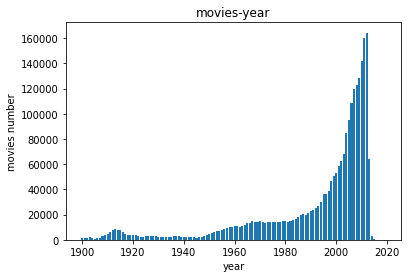

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
df = movies_year[movies_year['year']>=1900]
fig,ax = plt.subplots(1,1)
ax.bar(df['year'],df['id'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.title("movies-year")    #给此图命名标签
plt.xlabel("year")          #给x轴命名标签
plt.ylabel("movies number") #给y轴命名标签
plt.show()

In [10]:
for m in all_movies['movie'].to_list():
    if type(m)!=type('1'):
        print(m,type(m))

nan <class 'float'>
nan <class 'float'>


['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '--', '.', '..', '...', '......', '...................', './', '.一', '.数', '.日', '/', '//', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '://', '::', ';', '<', '=', '>', '>>', '?', '@', 'A', 'Lex', '[', '\\', ']', '^', '_', '`', 'exp', 'sub', 'sup', '|', '}', '~', '~~~~', '·', '×', '×××', 'Δ', 'Ψ', 'γ', 'μ', 'φ', 'φ．', 'В', '—', '——', '———', '‘', '’', '’‘', '“', '”', '”，', '…', '……', '…………………………………………………③', '′∈', '′｜', '℃', 'Ⅲ', '↑', '→', '∈［', '∪φ∈', '≈', '①', '②', '②ｃ', '③', '③］', '④', '⑤', '⑥', '⑦', '⑧', '⑨', '⑩', '──', '■', '▲', '', '、', '。', '〈', '〉', '《', '》', '》），', '」', '『', '』', '【', '】', '〔', '〕', '〕〔', '㈧', '一', '一.', '一一', '一下', '一个', '一些', '一何', '一切', '一则', '一则通过', '一天', '一定', '一方面', '一旦', '一时', '一来', '一样', '一次', '一片', '一番', '一直', '一致', '一般', '一起', '一转眼', '一边', '一面', '七', '万一', '三', '三天两头', '三番两次', '三番五次', '上', '上下', '上升', '上去', '上来', '上述', '上面', '下', '下列', '下去', '下来', '下面', '不', '不一', '不下', '不久', 

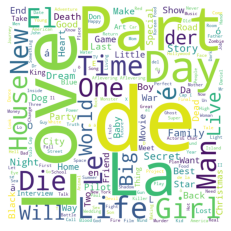

In [13]:
import wordcloud
import jieba
import jieba.posseg as psg

def stopwordslist(stopwords_path):
    stopwords = [line.strip() for line in open(stopwords_path,encoding='UTF-8').readlines()]
    return stopwords

#常见停用词
chsw = stopwordslist('stopword.txt')
ensw = stopwordslist('stopworde.txt')

#分词去掉停用词
def cut_words(words_list):
    cuts = []
    i=1
    for word in words_list:
        if type(word)==type('1'):
            words = jieba.cut(word)
            ws = []
#             print(i,word)
            i+=1
            for w in words:
                if w not in chsw and w not in ensw:
                    ws.append(w)
            cuts.extend(ws)
    return cuts

WC = wordcloud.WordCloud(max_words=200,height= 600,width=600,background_color='white',repeat=False,mode='RGBA')
cuts = cut_words(all_movies[all_movies['year']==2012]['movie'].to_list())
content = ' '.join(cuts)
con = WC.generate(content)
plt.imshow(con)
plt.axis("off")
plt.show()

In [17]:
dt =data7.set_index("id").to_dict()['title']

In [23]:
dt.get(2541)

'Suspicion Arises as Anna and Sophia Go Deeper in Their Plan'

In [27]:
import json
movie_score_list = {}
for row_index,row in data.iterrows():
    print(row_index,row['movie_score'])
    movie_score_list[row['userId']]=json.loads(row['movie_score'])

0 {"110":1.0,"147":4.5,"858":5.0,"1221":5.0,"1246":5.0,"1968":4.0,"2762":4.5,"2918":5.0,"2959":4.0,"4226":4.0,"4878":5.0,"5577":5.0,"33794":4.0,"54503":3.5,"58559":4.0,"59315":5.0,"68358":5.0,"69844":5.0,"73017":5.0,"81834":5.0,"91500":2.5,"91542":5.0,"92439":5.0,"96821":5.0,"98809":0.5,"99114":4.0,"112552":5.0}
1 {"150":4.0,"153":3.0,"165":4.0,"296":5.0,"344":4.0,"349":5.0,"380":5.0,"457":4.0,"588":5.0,"590":3.0,"592":4.0,"593":4.0,"595":5.0}
2 {"247":3.0,"1261":3.5,"1611":3.5}
3 {"527":4.0,"778":3.0,"1060":3.0,"1097":4.0,"1985":3.0,"2054":4.0}
4 {"1197":4.5,"68954":5.0,"88810":4.5,"93510":3.5,"96821":3.0,"97913":5.0,"108932":4.5,"116823":5.0,"152081":3.5,"170026":4.0}
5 {"2":4.0,"11":5.0,"32":5.0,"34":5.0,"39":5.0,"47":5.0,"50":5.0,"95":4.0,"150":4.0,"165":4.0,"185":3.0,"282":4.0,"292":3.0,"296":5.0,"316":4.0,"317":4.0,"318":4.0,"344":1.0,"349":5.0,"350":4.0,"356":5.0,"364":5.0,"367":5.0,"377":5.0,"380":3.0,"434":5.0,"454":4.0,"457":4.0,"474":4.0,"480":5.0,"500":4.0,"508":5.0,"509":5

JSONDecodeError: Expecting ',' delimiter: line 1 column 1025 (char 1024)

In [25]:
movie_score_list

{1: '{"110":1.0,"147":4.5,"858":5.0,"1221":5.0,"1246":5.0,"1968":4.0,"2762":4.5,"2918":5.0,"2959":4.0,"4226":4.0,"4878":5.0,"5577":5.0,"33794":4.0,"54503":3.5,"58559":4.0,"59315":5.0,"68358":5.0,"69844":5.0,"73017":5.0,"81834":5.0,"91500":2.5,"91542":5.0,"92439":5.0,"96821":5.0,"98809":0.5,"99114":4.0,"112552":5.0}',
 10: '{"150":4.0,"153":3.0,"165":4.0,"296":5.0,"344":4.0,"349":5.0,"380":5.0,"457":4.0,"588":5.0,"590":3.0,"592":4.0,"593":4.0,"595":5.0}',
 100: '{"247":3.0,"1261":3.5,"1611":3.5}',
 1000: '{"527":4.0,"778":3.0,"1060":3.0,"1097":4.0,"1985":3.0,"2054":4.0}',
 10000: '{"1197":4.5,"68954":5.0,"88810":4.5,"93510":3.5,"96821":3.0,"97913":5.0,"108932":4.5,"116823":5.0,"152081":3.5,"170026":4.0}',
 100000: '{"2":4.0,"11":5.0,"32":5.0,"34":5.0,"39":5.0,"47":5.0,"50":5.0,"95":4.0,"150":4.0,"165":4.0,"185":3.0,"282":4.0,"292":3.0,"296":5.0,"316":4.0,"317":4.0,"318":4.0,"344":1.0,"349":5.0,"350":4.0,"356":5.0,"364":5.0,"367":5.0,"377":5.0,"380":3.0,"434":5.0,"454":4.0,"457":4.0,"474

In [6]:
# data8 = data8.iloc[:,0:3]

In [7]:
# data8.sample(10)

,id,movie_id,episode_nr
330405,315136,2434973,Beware of Pickpockets
360886,354870,1772389,Cina
27528,5192,341924,Hitlers Todesbrigaden
64504,55571,1732577,Eine verhexte Affäre
40555,2699,165262,Magic Words
51117,93106,1837486,Il dottor Faustus
306989,327769,2466348,A Dead Town
105894,140112,1969500,Müller Stiefelabsätze
41827,34689,1667828,Lady Genie
66112,82819,1812692,Pilot X


In [8]:
# movies_dict = data8.set_index("movie_id").to_dict()['episode_nr']

In [9]:
# movies_dict

{833595: 'Young Hearts ID',
 393076: 'Dirty Pair',
 1662042: 'Heaven',
 1651366: 'Un lac pour la prairie',
 1639798: '28 giorni',
 1670559: 'Immer noch Orang-Utans',
 1708452: 'Backstreet Justice - Knallhart und unbestechlich',
 1080309: 'The Defence Lawyer',
 1654848: 'Typisch britisch',
 751100: 'Around the World with Willy Fog',
 1697797: 'Cinderella',
 1664452: 'The Pain',
 899231: 'Der Mann im Rathaus',
 979751: 'Tar det åt hjärtat?',
 1119850: 'The Attack',
 1687488: "Antonio's Secret",
 1669200: 'Restrisiko 100%',
 1666024: 'Adieu Bonaparte',
 253704: 'Ein Hauch von Mord',
 1658918: 'Triumph des Herzens',
 1707580: 'Himmelskinder',
 702203: 'ëÁÚÕÓ ëÕËÏÃËÏÇÏ',
 1674219: 'King of the Joropo',
 1665361: 'Story of Adachi Factory: For the Job Development of the Disabled in the Industrial Vocational Aid Center',
 620172: 'Howard Stern: On the Air',
 1042451: 'Primetime',
 1634109: 'Letters from a Friend',
 1634429: '06/05: The Sixth of May',
 1615418: 'Brave Raideen',
 1699464: 'Assau

In [10]:
# re=movies_dict.get(1715707)

In [24]:
#read the data
# data={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
#  'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5},
# 'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
#  'Just My Luck': 1.5, 'The Night Listener': 3.0}, 
# 'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
#  'Superman Returns': 3.5, 'The Night Listener': 4.0},
# 'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
#  'The Night Listener': 4.5, 'You, Me and Dupree': 2.5},
# 'Mick LaSalle': {'Just My Luck': 2.0, 'Lady in the Water': 3.0,'Superman Returns': 3.0, 'The Night Listener': 3.0, 'You, Me and Dupree': 2.0}, 
# 'Jack Matthews': {'Snakes on a Plane': 4.0, 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
# 'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}
 

In [26]:
#clean&transform the data
data1 = pd.DataFrame(movie_score_list)

ValueError: If using all scalar values, you must pass an index

In [16]:
data1

,userId,movie_score
0,1,"""1"":{""110"":1.0,""147"":4.5,""858"":5.0,""1221"":5.0,..."
1,10,"""10"":{""150"":4.0,""153"":3.0,""165"":4.0,""296"":5.0,..."
2,100,"""100"":{""247"":3.0,""1261"":3.5,""1611"":3.5}"
3,1000,"""1000"":{""527"":4.0,""778"":3.0,""1060"":3.0,""1097"":..."
4,10000,"""10000"":{""1197"":4.5,""68954"":5.0,""88810"":4.5,""9..."
...,...,...
270891,99995,"""99995"":{""12"":4.0,""18"":5.0,""47"":5.0,""50"":5.0,""..."
270892,99996,"""99996"":{""356"":4.0,""480"":1.0,""1080"":4.0,""1089""..."
270893,99997,"""99997"":{""6"":3.0,""25"":5.0,""26"":3.0,""35"":3.0,""7..."
270894,99998,"""99998"":{""333"":1.5,""585"":0.5,""1093"":4.5,""1333""..."


In [27]:
#0 represents not been rated
data = data.fillna(0)

In [28]:
data

,Lisa Rose,Gene Seymour,Michael Phillips,Claudia Puig,Mick LaSalle,Jack Matthews,Toby
Lady in the Water,2.5,3.0,2.5,0.0,3.0,0.0,0.0
Snakes on a Plane,3.5,3.5,3.0,3.5,0.0,4.0,4.5
Just My Luck,3.0,1.5,0.0,3.0,2.0,0.0,0.0
Superman Returns,3.5,0.0,3.5,0.0,3.0,5.0,4.0
"You, Me and Dupree",2.5,0.0,0.0,2.5,2.0,3.5,1.0
The Night Listener,0.0,3.0,4.0,4.5,3.0,3.0,0.0


In [29]:
#each column represents a movie
mdata = data.T

In [30]:
mdata

,Lady in the Water,Snakes on a Plane,Just My Luck,Superman Returns,"You, Me and Dupree",The Night Listener
Lisa Rose,2.5,3.5,3.0,3.5,2.5,0.0
Gene Seymour,3.0,3.5,1.5,0.0,0.0,3.0
Michael Phillips,2.5,3.0,0.0,3.5,0.0,4.0
Claudia Puig,0.0,3.5,3.0,0.0,2.5,4.5
Mick LaSalle,3.0,0.0,2.0,3.0,2.0,3.0
Jack Matthews,0.0,4.0,0.0,5.0,3.5,3.0
Toby,0.0,4.5,0.0,4.0,1.0,0.0


In [ ]:
#calculate the simularity of different movies, normalize the data into [0,1]
np.set_printoptions(2)

In [ ]:
mcors = np.corrcoef(mdata, rowvar=0)

In [ ]:
mcors

In [34]:
mcors = 0.5+mcors*0.5

In [35]:
mcors

array([[1.   , 0.2  , 0.625, 0.404, 0.257, 0.516],
       [0.2  , 1.   , 0.351, 0.53 , 0.494, 0.35 ],
       [0.625, 0.351, 1.   , 0.212, 0.653, 0.508],
       [0.404, 0.53 , 0.212, 1.   , 0.66 , 0.275],
       [0.257, 0.494, 0.653, 0.66 , 1.   , 0.466],
       [0.516, 0.35 , 0.508, 0.275, 0.466, 1.   ]])

In [36]:
mcors = pd.DataFrame(mcors, columns=mdata.columns, index=mdata.columns)

In [37]:
mcors

,Lady in the Water,Snakes on a Plane,Just My Luck,Superman Returns,"You, Me and Dupree",The Night Listener
Lady in the Water,1.000000,0.199972,0.625359,0.403566,0.256992,0.515574
Snakes on a Plane,0.199972,1.000000,0.350746,0.530161,0.493954,0.350006
Just My Luck,0.625359,0.350746,1.000000,0.212285,0.652772,0.508400
Superman Returns,0.403566,0.530161,0.212285,1.000000,0.659582,0.275360
"You, Me and Dupree",0.256992,0.493954,0.652772,0.659582,1.000000,0.465637
The Night Listener,0.515574,0.350006,0.508400,0.275360,0.465637,1.000000


In [38]:
#calculate the score of every item of every user
#matrix:the user-movie matrix
#mcors:the movie-movie correlation matrix
#item:the movie id
#user:the user id
#score:score of movie for the specific user 
def cal_score(matrix,mcors,item,user):
    totscore = 0
    totsims = 0
    score = 0
    if pd.isnull(matrix[item][user]) or matrix[item][user]==0:
        for mitem in matrix.columns:
            if matrix[mitem][user]==0:
                continue
            else:
                totscore += matrix[mitem][user]*mcors[item][mitem]
                totsims += mcors[item][mitem]
        score = totscore/totsims
    else:
        score = matrix[item][user]
    return score

In [39]:
#calculate the socre matrix
#matrix:the user-movie matrix
#mcors:the movie-movie correlation matrix
#score_matrix:score matrix of movie for different users 
def cal_matscore(matrix,mcors):
    score_matrix = np.zeros(matrix.shape)
    score_matrix = pd.DataFrame(score_matrix, columns=matrix.columns, index=matrix.index)
    for mitem in score_matrix.columns:
        for muser in score_matrix.index:
            score_matrix[mitem][muser]  = cal_score(matrix,mcors,mitem,muser)
    return score_matrix

In [44]:
#give recommendations: depending on the score matrix
#matrix:the user-movie matrix
#score_matrix:score matrix of movie for different users 
#user:the user id
#n:the number of recommendations
def recommend(matrix,score_matrix,user,n):
    user_ratings = matrix.loc[user]
    not_rated_item = user_ratings[user_ratings==0]
    recom_items = {}
    #recom_items={'a':1,'b':7,'c':3}
    for item in not_rated_item.index:
        recom_items[item] = score_matrix[item][user]
    recom_items = pd.Series(recom_items)
    recom_items = recom_items.sort_values(ascending=False)
    return recom_items[:n]  

In [ ]:
#main
score_matrix = cal_matscore(mdata,mcors)
for i in range(10):
    user = input(str(i)+' please input the name of user:')
    print (recommend(mdata,score_matrix,user,2))

0 please input the name of user:Toby
Lady in the Water     3.220259
The Night Listener    2.880014
dtype: float64
